# Movie Poster: can we predict the genre from it?
![](https://miro.medium.com/max/3840/1*jbfWuj3RSAAvmJeBwLWbsw.jpeg)

---

Introduction

> For movie viewers, the movie posters are one of the first impressions which humans use to get cues
about the movie content and its genre. Humans can grasp the cues like color, expressions on the faces of actors etc to quickly determine the genre (horror, comedy, animation etc). It has been shown that color characteristics of an image like hues, saturation, brightness, contour etc. affect human emotions. A given situation arouses these emotions in humans. If humans are able to predict genre of a movie by a single glance at its poster, then we can assume that the color characteristics, local texture based features and structural cues of posters possess some characteristics which could be utilized in machine learning algorithms to predict its genre.



## 1. PREPARATION

### 1.1. Import libraries

In [ ]:
import shutil
import os
import pathlib
import zipfile
from glob import glob
import logging
import warnings
import sys
import sklearn
import json
import urllib.request
import random

import numpy as np 
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.style as style
from PIL import Image
import seaborn as sns

from tqdm import tqdm
from itertools import chain
from collections import Counter, defaultdict


from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D


warnings.filterwarnings('ignore')
logging.getLogger("tensorflow").setLevel(logging.ERROR)
sns.set_style('white')

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1.2 Locate dataset

In [ ]:
PROJECT_FOLDER = '/home/jupyter/project_w8'
DATASET_PATH = os.path.join(PROJECT_FOLDER, "dataset")
DATASET_RAW_PATH = os.path.join(DATASET_PATH, "raw")


### 1.3 Clean and download data

Our dataset is a csv file that contain .....

In [ ]:
# Take a look at the csv file
pd.set_option('display.max_colwidth', -1)
movie = pd.read_csv("project_w8/MovieGenre.csv", engine='python')
movie

imdbId                           Imdb Link  \
0      114709  http://www.imdb.com/title/tt114709   
1      113497  http://www.imdb.com/title/tt113497   
2      113228  http://www.imdb.com/title/tt113228   
3      114885  http://www.imdb.com/title/tt114885   
4      113041  http://www.imdb.com/title/tt113041   
...       ...                                 ...   
40103  83168   http://www.imdb.com/title/tt83168    
40104  82875   http://www.imdb.com/title/tt82875    
40105  815258  http://www.imdb.com/title/tt815258   
40106  79142   http://www.imdb.com/title/tt79142    
40107  70710   http://www.imdb.com/title/tt70710    

                                    Title  IMDB Score  \
0      Toy Story (1995)                    8.3          
1      Jumanji (1995)                      6.9          
2      Grumpier Old Men (1995)             6.6          
3      Waiting to Exhale (1995)            5.7          
4      Father of the Bride Part II (1995)  5.9          
...                                   ...  ...          
40103  Tanya's Island (1980)               4.3          
40104  Pacific Banana (1981)               4.7          
40105  Werewolf in a Womens Prison (2006)  4.5          
40106  Xiao zi ming da (1979)              6.5          
40107  Snatched (1973)                     6.5          

                            Genre  \
0      Animation|Adventure|Comedy   
1      Action|Adventure|Family      
2      Comedy|Romance               
3      Comedy|Drama|Romance         
4      Comedy|Family|Romance        
...                      ...        
40103  Drama                        
40104  Comedy                       
40105  Horror                       
40106  Action|Comedy                
40107  Crime|Drama|Thriller         

                                                                                                                                                                   Poster  
0      https://images-na.ssl-images-amazon.com/images/M/MV5BMDU2ZWJlMjktMTRhMy00ZTA5LWEzNDgtYmNmZTEwZTViZWJkXkEyXkFqcGdeQXVyNDQ2OTk4MzI@._V1_UX182_CR0,0,182,268_AL_.jpg   
1      https://images-na.ssl-images-amazon.com/images/M/MV5BZTk2ZmUwYmEtNTcwZS00YmMyLWFkYjMtNTRmZDA3YWExMjc2XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UY268_CR10,0,182,268_AL_.jpg  
2      https://images-na.ssl-images-amazon.com/images/M/MV5BMjQxM2YyNjMtZjUxYy00OGYyLTg0MmQtNGE2YzNjYmUyZTY1XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg   
3      https://images-na.ssl-images-amazon.com/images/M/MV5BMTczMTMyMTgyM15BMl5BanBnXkFtZTcwOTc4OTQyMQ@@._V1_UY268_CR4,0,182,268_AL_.jpg                                   
4      https://images-na.ssl-images-amazon.com/images/M/MV5BOTEyNzg5NjYtNDU4OS00MWYxLWJhMTItYWU4NTkyNDBmM2Y0XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg   
...                                                                                                                                                                  ...   
40103  https://images-na.ssl-images-amazon.com/images/M/MV5BMTQ1NzY4OTA1Ml5BMl5BanBnXkFtZTcwOTEzNjcyMQ@@._V1_UY268_CR4,0,182,268_AL_.jpg                                   
40104  https://images-na.ssl-images-amazon.com/images/M/MV5BMTQ3MzU2NzM4OF5BMl5BanBnXkFtZTcwMDIxNDMzMQ@@._V1_UY268_CR4,0,182,268_AL_.jpg                                   
40105  https://images-na.ssl-images-amazon.com/images/M/MV5BMTY1MzAyMDk3Nl5BMl5BanBnXkFtZTcwMjI0Mzk2MQ@@._V1_UY268_CR4,0,182,268_AL_.jpg                                   
40106  https://images-na.ssl-images-amazon.com/images/M/MV5BMjA0NTQ2MTc0OF5BMl5BanBnXkFtZTYwMzU0NjQ5._V1_UX182_CR0,0,182,268_AL_.jpg                                       
40107  NaN                                                                                                                                                                 

[40108 rows x 6 columns]

In [ ]:
# Checking the data frame
print(movie.isnull().sum())
print('Number of duplicated rows: ', movie.duplicated().sum())

imdbId        0  
Imdb Link     0  
Title         0  
IMDB Score    48 
Genre         145
Poster        725
dtype: int64
Number of duplicated rows:  593


In [ ]:
# Drop null and duplicated:
movie.dropna(axis = 0, inplace = True)
movie.drop_duplicates(inplace = True)

# Drop urls don't contain ".jpg"
movie = movie[movie['Poster'].str.endswith('jpg')]

movie.reset_index(drop=True, inplace=True)

We start downloading all posters from the corrispondent link and we save each of them using as name of the related movie. In this way we maintain the relationship between movies and their poster images.

Note: some images could be corrupted during the download or they may not be found at all. For those reasons we check for corrupted images after download and also we drop from dataset rows corresponding to movie whose poster was not found.

In [ ]:
# Begin to download
id = 0
no_image_id = []
for url in movie['Poster']:
    try:
        image_name = str(movie['imdbId'][id]) + '.jpg'
        urllib.request.urlretrieve(url, DATASET_RAW_PATH + '/' + image_name)
    except:
        print('Id does not have poster: ', id)
        no_image_id.append(id)
    id += 1

Remove movies that don't have poster image 

In [ ]:
list_image_id = [id.split('.')[0] for id in os.listdir(DATASET_RAW_PATH)]
movie = movie[movie['imdbId'].isin(list_image_id)]

In [ ]:
# checking downloaded images and dataframe rows is the same
len(os.listdir(DATASET_RAW_PATH)) == movie.shape[0]

True

In [ ]:
# save it to csv file
movie.to_csv(PROJECT_FOLDER +'/movie_genre.csv', encoding='utf-8')

In [ ]:
df = pd.read_csv('project_w8/movie_genre.csv')
df = df[['imdbId', 'Genre']] # we only need 'imdbId', 'Genre' column for the work 
df 

imdbId                       Genre
0      114709   Animation|Adventure|Comedy
1      113497   Action|Adventure|Family   
2      113228   Comedy|Romance            
3      114885   Comedy|Drama|Romance      
4      113041   Comedy|Family|Romance     
...       ...                     ...     
31833  3155794  Documentary|Short         
31834  1754944  Romance                   
31835  4934950  Biography|Crime|Drama     
31836  85316    Drama|Fantasy|Musical     
31837  84953    Drama|Romance             

[31838 rows x 2 columns]

## 2. DATA EXPLORATION

First, let's see which movie genres that we have in the dataset.

In [ ]:
labels_list = list(chain.from_iterable([i.split("|") for i in df['Genre'].values]))
labels_set = set(labels_list)


print("There is {} unique labels including {}".format(len(labels_set), labels_set))

There is 28 unique labels including {'Musical', 'Crime', 'Short', 'History', 'Music', 'Romance', 'Drama', 'Film-Noir', 'Reality-TV', 'Fantasy', 'Horror', 'Western', 'News', 'Game-Show', 'Documentary', 'Thriller', 'Biography', 'Mystery', 'Animation', 'Talk-Show', 'Adult', 'War', 'Family', 'Comedy', 'Adventure', 'Sci-Fi', 'Action', 'Sport'}


Display the distribution of these genres.

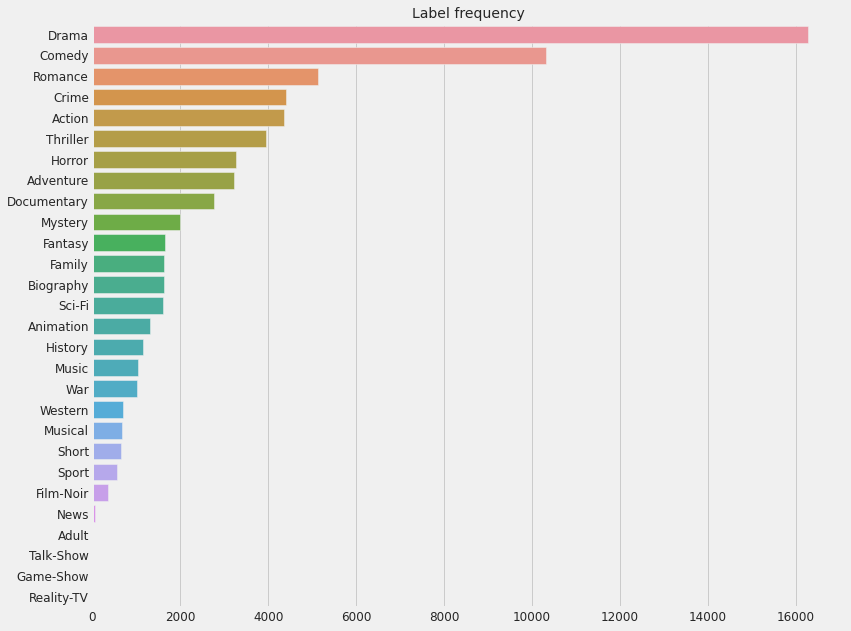

In [ ]:
# Get label frequencies in descending order
label_freq = df['Genre'].apply(lambda s: str(s).split('|')).explode().value_counts().sort_values(ascending=False)

# Bar plot
style.use("fivethirtyeight")
plt.figure(figsize=(12,10))
sns.barplot(y=label_freq.index.values, x=label_freq, order=label_freq.index)
plt.title("Label frequency", fontsize=14)
plt.xlabel("")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

As we can see, our data is heavily imbalanced with respect genres.There are many occurrences of genres like "Comedy" and "Drama" and a very low number for other ones. 
We will consider as a rare label every label that is covered by less than 1000 posters in our dataset and they are very hard to predict due to lack of sufficient data. So, we need to make some transformation in the label column (Genre) where we ignore infrequent labels by hiding them.



In [ ]:
# Create a list of rare labels
rare = list(label_freq[label_freq<1000].index)
print("We will be ignoring these rare labels:", rare)

We will be ignoring these rare labels: ['Western', 'Musical', 'Short', 'Sport', 'Film-Noir', 'News', 'Adult', 'Talk-Show', 'Game-Show', 'Reality-TV']


In [ ]:
# Transform Genre into a list of labels and remove the rare ones
df['Genre'] = df['Genre'].apply(lambda s: [l for l in str(s).split('|') if l not in rare])
df.head()

imdbId                           Genre
0  114709  [Animation, Adventure, Comedy]
1  113497  [Action, Adventure, Family]   
2  113228  [Comedy, Romance]             
3  114885  [Comedy, Drama, Romance]      
4  113041  [Comedy, Family, Romance]

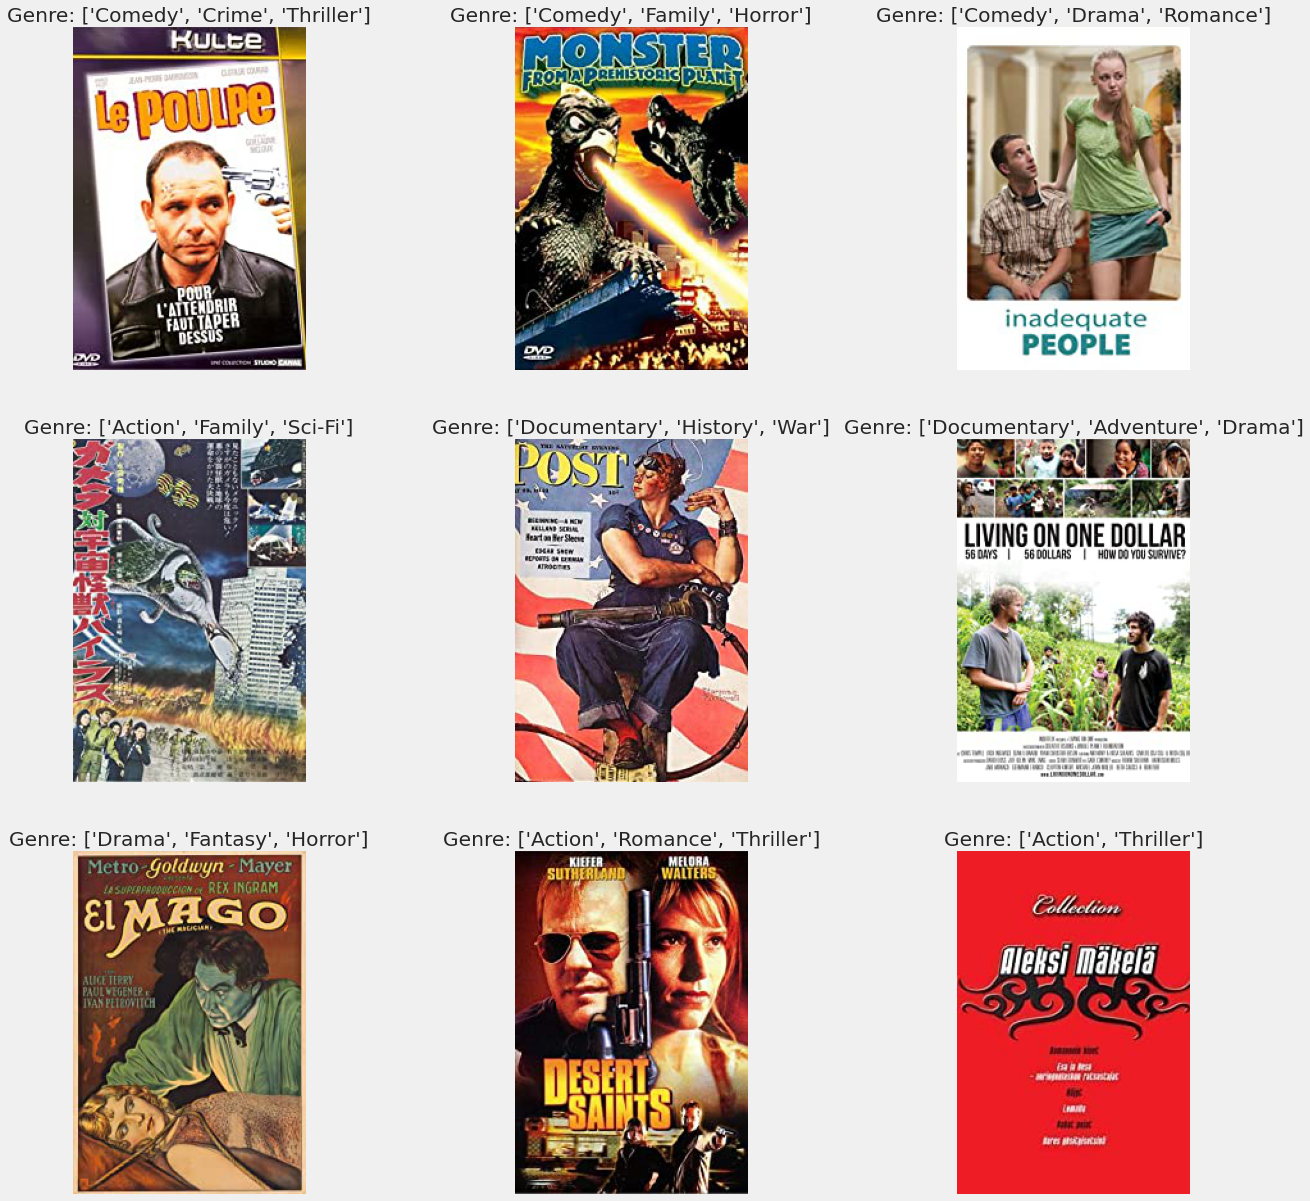

In [ ]:
samples = random.sample(os.listdir(DATASET_RAW_PATH),9)
plt.figure(figsize=(20, 20))
for index, image_name in enumerate(samples):
    index += 1
    plt.subplot(3, 3, index)

    img = mpimg.imread(DATASET_RAW_PATH + '/' + image_name)
    plt.imshow(img)

    genre = df.loc[df['imdbId'] == int(image_name.split('.')[0]), 'Genre'].values[0]
    plt.title("Genre: {}".format(genre))
    plt.axis("off")

plt.show()

## 3. DATA PRE-PROCESSING

To speeding up our learning and give time for improving model, we choose to work on a small sample of dataset first.

In [ ]:
from sklearn.utils import shuffle

sample_df = df.copy()
# sample_df = shuffle(sample_df)
# sample_df = sample_df[:10000]

Turning the filename into filepaths so that we can read the image from its directory later

In [ ]:
from sklearn.model_selection import train_test_split

X = [os.path.join(DATASET_RAW_PATH, str(i) + '.jpg') for i in sample_df['imdbId']]
y = sample_df['Genre']
train_img, val_img, train_label, val_label = train_test_split(X, y, test_size = 0.2, random_state = 10)

TRAIN_SAMPLES = len(train_img)
VAL_SAMPLES = len(val_img)

print (TRAIN_SAMPLES, VAL_SAMPLES)

25470 6368


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Fit multi-label binarizer on the training set
mlb = MultiLabelBinarizer()
mlb.fit(train_label)

# Print out label map 
print('Labels: ')
label_map = {}
for i, label in enumerate(mlb.classes_):
    label_map[i] = label
    print('{}. {}'.format(i, label))

# Define num. of labels 
N_LABELS = len(mlb.classes_)

Labels: 
0. Action
1. Adventure
2. Animation
3. Biography
4. Comedy
5. Crime
6. Documentary
7. Drama
8. Family
9. Fantasy
10. History
11. Horror
12. Music
13. Mystery
14. Romance
15. Sci-Fi
16. Thriller
17. War


In [ ]:
# Transform the targets of both training set and validation set
y_train = mlb.transform(train_label)
y_val = mlb.transform(val_label)

# Print 3 examples
for i in range(3):
    print(train_img[i], y_train[i])

/home/jupyter/project_w8/dataset/raw/88206.jpg [1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
/home/jupyter/project_w8/dataset/raw/780516.jpg [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]
/home/jupyter/project_w8/dataset/raw/300051.jpg [0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0]


In the case of multi-label classification, having an image directory that respects this structure is not possible because one observation can belong to multiple classes at the same time.

That is where the tf.data API has the upper hand.

It is faster.
It provides fine-grained control.
It is well integrated with the rest of TensorFlow.
We first need to write some function to parse image files and generate a tensor representing the features and a tensor representing the labels.

In this function we can resize the image to adapt to the input expected by the model.
We can also normalize the pixel values to be between 0 and 1. This is a common practice that helps speed up the convergence of training.
If we consider every pixel as a feature, we would like these features to have a similar range so that the gradients don't go out of control and that we only need one global learning rate multiplier.

In [ ]:
IMG_WIDTH, IMG_HEIGHT = 192, 192
CHANNELS = 3

BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 2048
AUTOTUNE = tf.data.experimental.AUTOTUNE

EPOCHS = 30

In [ ]:
def preprocess(path, label):
    """Function that returns a tuple of normalized image array and labels array.
      Args:
          path: string representing path to image
          label: 0/1 one-dimensional array of size N_LABELS
      """
    # Read an image from a file
    image = tf.io.read_file(path)
    # Decode it into a dense vector
    image = tf.image.decode_jpeg(image, channels=CHANNELS)
    # Resize it to fixed shape
    image = tf.image.resize(image, [IMG_WIDTH, IMG_HEIGHT])
    # Normalize it from [0, 255] to [0.0, 1.0]
    image = image / 255.0
    #image = tf.image.per_image_standardization(image)
    return image, label

def augmentation(image, label):
    # image = tf.image.random_brightness(image, .1)
    # image = tf.image.random_contrast(image, lower=0.0, upper=1.0)
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image, label

To train a model on our dataset we want the data to be:

- Well shuffled
- Batched
- Batches to be available as soon as possible.

In [ ]:
def create_dataset(filenames, labels, is_training = True, augment = False):
    """Load and parse dataset.
       Args: filenames: list of image paths
             labels: numpy array of shape(BATCH_SIZE, N_LABELS)
             is_trainning: boolean to indicate training mode
             augment: boolean to indicate augment option. 
    """
    
    # Create a first dataset of file paths and labels
    dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
    
    # Parse and preprocess observations in parallel
    dataset = dataset.map(preprocess, num_parallel_calls = AUTOTUNE)
    
    if is_training == True:
        # This is a small dataset, only load it once, and keep it in memory.
        # use `.cache(filename)` to cache preprocessing work for datasets that don't
        # fit in memory.
        dataset = dataset.cache()
        
        # Shufle the data each buffer size and keep repeating shuffling
        dataset = dataset.shuffle(buffer_size = SHUFFLE_BUFFER_SIZE)
        dataset = dataset.repeat()
    
    if augment == True:
        dataset.map(augmentation, num_parallel_calls=AUTOTUNE)
    
    #Batch dataset for multiple steps
    dataset = dataset.batch(BATCH_SIZE)
    #Fetch batches in the background while the model is training
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    
    return dataset

In [ ]:
train_ds = create_dataset(train_img, y_train, augment = False)
val_ds = create_dataset(val_img, y_val)

Each batch will be a pair of arrays (one that holds the features and another one that holds the labels).<br>
The features array will be of shape (BATCH_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS).<br>
The labels array will be of shape (BATCH_SIZE, N_LABELS) where N_LABELS is the maximum number of labels.<br>
Let's verify the shapes of these arrays by analyzing the first batch:

In [ ]:
for f, l in train_ds.take(1):
    print('Shape of features array:', f.numpy().shape)
    print('Shape of labels array:', l.numpy().shape)

Shape of features array: (32, 192, 192, 3)
Shape of labels array: (32, 18)


## 4. MODEL

### 4.1 Build model

We use MobileNetV2 as base model for transfer learning

In [ ]:
def build_model(trainable = False, fine_tune_at = 0):
    """Build a Sequential model with the MobileNetv2 as base model and additional top layers.
       The MobileNetv2 can be trained with certain number of layers.
       args:
           trainable: boolean, dictate whether transfer learning model can be trained or not.
           fine_tune_at: int, dictate the number of trainable layers.
    
    """
    mobile_net = tf.keras.applications.MobileNetV2(input_shape=(IMG_WIDTH, IMG_HEIGHT, CHANNELS), include_top=False)
    if trainable == True:
        mobile_net.trainable=True

        for layer in mobile_net.layers[:fine_tune_at]:
            layer.trainable = False
    else: 
        mobile_net.trainable = False
    
    model = tf.keras.Sequential([
        mobile_net,
        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(N_LABELS, activation = 'sigmoid')])  
    
    return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 6, 6, 256)         327936    
_________________________________________________________________
global_average_pooling2d_1 ( (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 18)                4626      
Total params: 2,590,546
Trainable params: 332,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
for batch in train_ds: 
    print(model.predict(batch)[:1])
    break

[[0.84718907 0.73616487 0.13863416 0.6077838  0.2605725  0.61505264
  0.87269247 0.49410278 0.30442545 0.23119843 0.47756523 0.6319448
  0.5458371  0.435879   0.6530845  0.6861326  0.15192221 0.37833244]]


### 4.2. Train and evaluate model

To facilitate the model performance, we use several Callbacks options:
- **CollectBatchStats**: a custom class which inherits Keras Callback, in order to collect log data for plotting purpose.
- **EarlyStopping**: to avoid overfitting
- **CheckPoint**: to save the best weights that the model produced.

In [ ]:
# Batch Stats Collector that inherits Keras Callback
class CollectBatchStats(tf.keras.callbacks.Callback):
    def __init__(self):
        self.batch_losses = []
        self.batch_acc = []
        self.batch_val_losses = []
        self.batch_val_acc = []

    def on_train_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs['loss'])
        self.batch_acc.append(logs['acc'])
        # reset_metrics: the metrics returned will be only for this batch. 
        # If False, the metrics will be statefully accumulated across batches.
        self.model.reset_metrics()
  
    def on_test_batch_end(self, batch, logs=None):
        self.batch_val_losses.append(logs['loss'])
        self.batch_val_acc.append(logs['acc'])
        # reset_metrics: the metrics returned will be only for this batch. 
        # If False, the metrics will be statefully accumulated across batches.
        self.model.reset_metrics()

# Plot learning curve 
def plot_stats(training_stats, val_stats, x_label='Training Steps', stats='loss'):
    stats, x_label = stats.title(), x_label.title()
    legend_loc = 'upper right' if stats=='loss' else 'lower right'
    training_steps = len(training_stats)
    test_steps = len(val_stats)

    plt.figure()
    plt.ylabel(stats)
    plt.xlabel(x_label)
    plt.plot(training_stats, label='Training ' + stats)
    plt.plot(np.linspace(0, training_steps, test_steps), val_stats, label='Validation ' + stats)
    plt.ylim([0,max(plt.ylim())])
    plt.legend(loc=legend_loc)
    plt.show()

In [ ]:
# Setting up EarlyStopping
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      mode='min',
                                      restore_best_weights=True,
                                      min_delta=1e-4,
                                      verbose=1,
                                      patience=5)

# Setting up CheckPoint 
checkpoint_path = os.path.join(PROJECT_FOLDER, "movie_poster_ckpt.h5")
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights by default it saves the weights every epoch
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only = True,
                                                 save_weights_only=True,
                                                 mornitor = 'val_loss',
                                                 verbose=1)

In [ ]:
num_steps_train = tf.math.ceil(float(TRAIN_SAMPLES)/BATCH_SIZE)              
num_steps_val = tf.math.ceil(float(VAL_SAMPLES)/BATCH_SIZE)

# Compile model with optimizer
model.compile(optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['acc'])

In [ ]:
# Train model
history = model.fit(train_ds,
                  steps_per_epoch = num_steps_train,
                  epochs = EPOCHS,
                  validation_data = val_ds,
                  validation_steps = num_steps_val,
                  callbacks=[cp_callback, earlystop])

Train for 796.0 steps, validate for 199.0 steps
Epoch 1/10
793/796 [============================>.] - ETA: 0s - loss: 0.2873 - acc: 0.8927
Epoch 00001: val_loss improved from inf to 0.30170, saving model to /home/jupyter/project_w8/movie_poster_ckpt.h5
796/796 [==============================] - 21s 27ms/step - loss: 0.2873 - acc: 0.8927 - val_loss: 0.3017 - val_acc: 0.8917
Epoch 2/10
793/796 [============================>.] - ETA: 0s - loss: 0.2719 - acc: 0.8966
Epoch 00002: val_loss did not improve from 0.30170
796/796 [==============================] - 18s 23ms/step - loss: 0.2719 - acc: 0.8966 - val_loss: 0.3114 - val_acc: 0.8880
Epoch 3/10
793/796 [============================>.] - ETA: 0s - loss: 0.2629 - acc: 0.8990
Epoch 00003: val_loss did not improve from 0.30170
796/796 [==============================] - 18s 23ms/step - loss: 0.2629 - acc: 0.8990 - val_loss: 0.3037 - val_acc: 0.8902
Epoch 4/10
793/796 [============================>.] - ETA: 0s - loss: 0.2541 - acc: 0.9017
Epo

<Figure size 1500x1000 with 0 Axes>

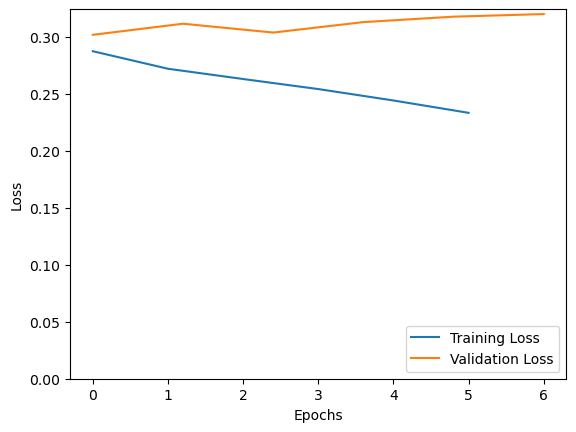

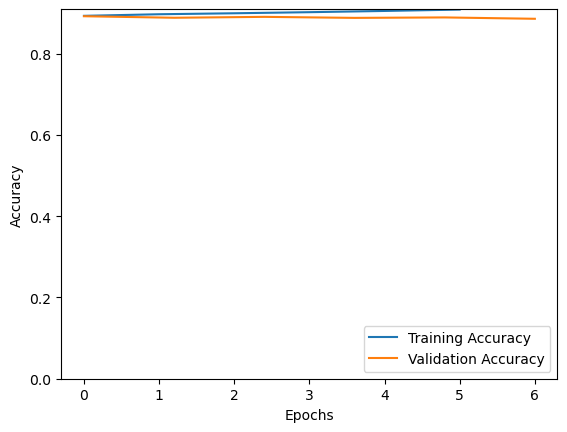

In [ ]:
plt.figure(figsize = (15, 10))

plot_stats(history.history['loss'], history.history['val_loss'], x_label='Epochs', stats='loss')
plot_stats(history.history['acc'], history.history['val_acc'], x_label='Epochs', stats='accuracy');

In [ ]:
model.save('movie_poster.h5')

In [ ]:
model = tf.keras.models.load_model('movie_poster.h5')

In [ ]:
def show_prediction(title, df, model):
    
    # Get movie info
    imdbId = df.loc[df['Title']==title]['imdbId'].iloc[0]
    genre = df.loc[df['Title']==title]['Genre'].iloc[0]
    img_path = os.path.join(DATASET_RAW_PATH, str(imdbId)+'.jpg')

    # Read and prepare image
    img = image.load_img(img_path, target_size=(IMG_WIDTH,IMG_HEIGHT,CHANNELS))
    img = image.img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)

    # Generate prediction
    prediction = (model.predict(img) > 0.5).astype('int')
    prediction = pd.Series(prediction[0])
    prediction.index = mlb.classes_
    prediction = prediction[prediction==1].index.values

    # Dispaly image with prediction
    style.use('default')
    plt.figure(figsize=(8,4))
    plt.imshow(Image.open(img_path))
    plt.title('\n\n{}\n\nGenre\n{}\n\nPrediction\n{}\n'.format(title, genre, list(prediction)), fontsize=9)
    plt.show()

Let's check some predictions

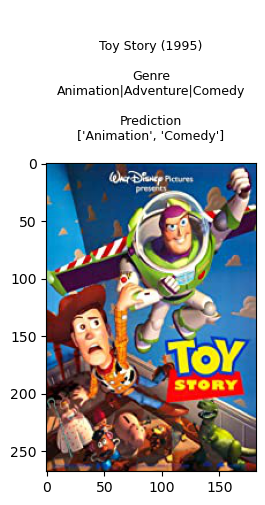

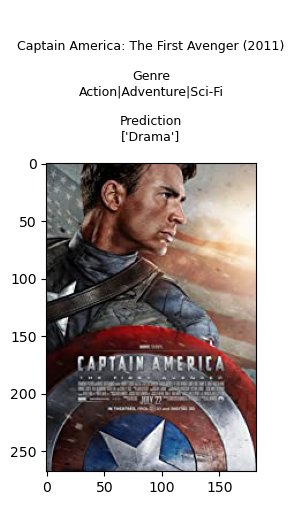

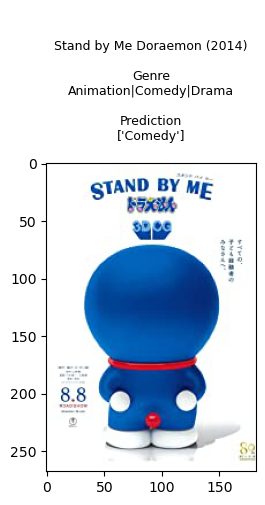

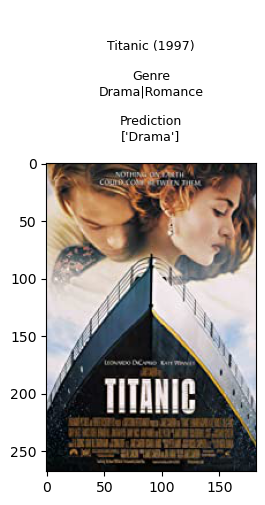

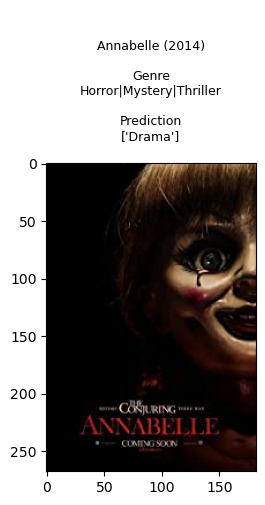

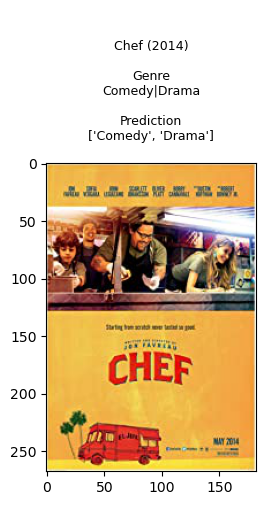

In [ ]:
titles = ["Toy Story (1995)",
          "Captain America: The First Avenger (2011)",
          "Stand by Me Doraemon (2014)",
          "Titanic (1997)",
          "Annabelle (2014)",
          "Chef (2014)"]

for t in titles:
    show_prediction(t, movie, model)

## F1-score

In [ ]:
@tf.function
def macro_soft_f1(y, y_hat):
    """Compute the macro soft F1-score as a cost (average 1 - soft-F1 across all labels).
    Use probability values instead of binary predictions.
    
    Args:
        y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        
    Returns:
        cost (scalar Tensor): value of the cost function for the batch
    """
    y = tf.cast(y, tf.float32)
    y_hat = tf.cast(y_hat, tf.float32)
    tp = tf.reduce_sum(y_hat * y, axis=0)
    fp = tf.reduce_sum(y_hat * (1 - y), axis=0)
    fn = tf.reduce_sum((1 - y_hat) * y, axis=0)
    soft_f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    cost = 1 - soft_f1 # reduce 1 - soft-f1 in order to increase soft-f1
    macro_cost = tf.reduce_mean(cost) # average on all labels
    return macro_cost

In [ ]:
@tf.function
def macro_f1(y, y_hat, thresh=0.5):val_acc
    """Compute the macro F1-score on a batch of observations (average F1 across labels)
    
    Args:
        y (int32 Tensor): labels array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        thresh: probability value above which we predict positive
        
    Returns:
        macro_f1 (scalar Tensor): value of macro F1 for the batch
    """
    y_pred = tf.cast(tf.greater(y_hat, thresh), tf.float32)
    tp = tf.cast(tf.math.count_nonzero(y_pred * y, axis=0), tf.float32)
    fp = tf.cast(tf.math.count_nonzero(y_pred * (1 - y), axis=0), tf.float32)
    fn = tf.cast(tf.math.count_nonzero((1 - y_pred) * y, axis=0), tf.float32)
    f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    macro_f1 = tf.reduce_mean(f1)
    return macro_f1

In [ ]:
num_steps_train = tf.math.ceil(float(TRAIN_SAMPLES)/BATCH_SIZE)              
num_steps_val = tf.math.ceil(float(VAL_SAMPLES)/BATCH_SIZE)

model.compile(optimizer = 'adam',
               loss = macro_soft_f1,
               metrics = [macro_f1])

In [ ]:
# Train model
history = model.fit(train_ds,
                  steps_per_epoch = num_steps_train,
                  epochs = EPOCHS,
                  validation_data = val_ds,
                  validation_steps = num_steps_val,
                  callbacks=[cp_callback, earlystop])

Train for 796.0 steps, validate for 199.0 steps
Epoch 1/10
795/796 [============================>.] - ETA: 0s - loss: 0.7254 - macro_f1: 0.2791
Epoch 00001: val_loss improved from inf to 0.78578, saving model to /home/jupyter/project_w8/movie_poster_ckpt.h5
796/796 [==============================] - 120s 151ms/step - loss: 0.7254 - macro_f1: 0.2791 - val_loss: 0.7858 - val_macro_f1: 0.2118
Epoch 2/10
793/796 [============================>.] - ETA: 0s - loss: 0.7044 - macro_f1: 0.2986
Epoch 00002: val_loss did not improve from 0.78578
796/796 [==============================] - 18s 23ms/step - loss: 0.7045 - macro_f1: 0.2985 - val_loss: 0.8223 - val_macro_f1: 0.1755
Epoch 3/10
793/796 [============================>.] - ETA: 0s - loss: 0.6946 - macro_f1: 0.3086
Epoch 00003: val_loss did not improve from 0.78578
796/796 [==============================] - 19s 23ms/step - loss: 0.6947 - macro_f1: 0.3085 - val_loss: 0.8105 - val_macro_f1: 0.1857
Epoch 4/10
793/796 [===========================

<Figure size 1080x720 with 0 Axes>

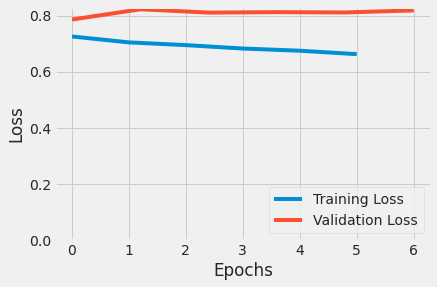

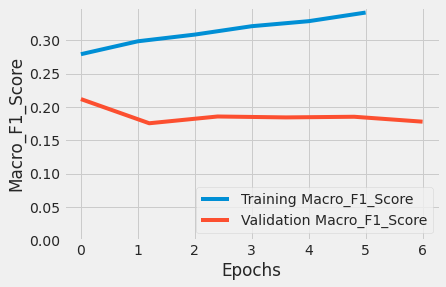

In [ ]:
plt.figure(figsize = (15, 10))

plot_stats(history.history['loss'], history.history['val_loss'], x_label='Epochs', stats='loss')
plot_stats(history.history['macro_f1'], history.history['val_macro_f1'], x_label='Epochs', stats='macro_F1_score');

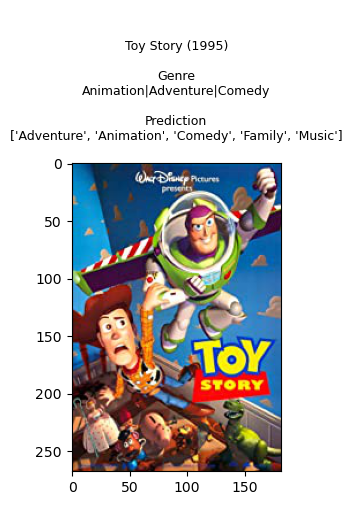

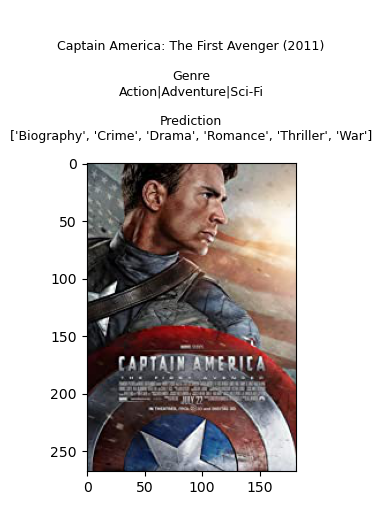

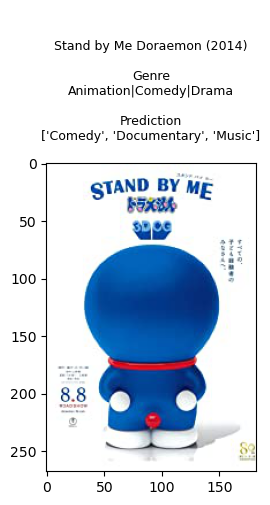

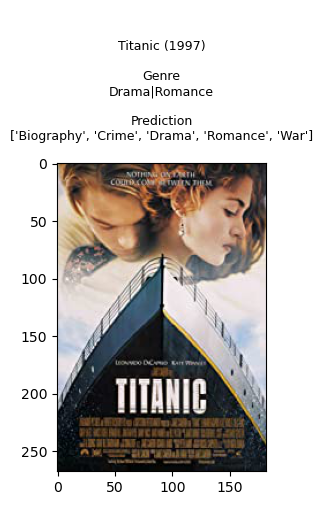

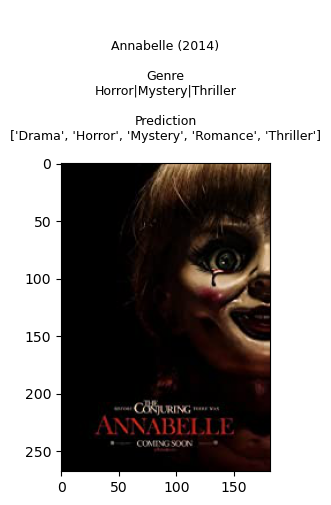

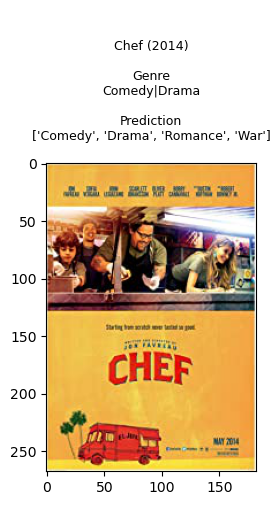

In [ ]:
titles = ["Toy Story (1995)",
          "Captain America: The First Avenger (2011)",
          "Stand by Me Doraemon (2014)",
          "Titanic (1997)",
          "Annabelle (2014)",
          "Chef (2014)"]

for t in titles:
    show_prediction(t, movie, model)